## Case Study 1(Cervical Cancer Risk Classification)    
    
   
    Age
    Number of sexual partners
    First sexual intercourse
    Num of pregnancies
    Smokes
    Smokes (years)
    Smokes (packs/year)
    Hormonal Contraceptives
    Hormonal Contraceptives (years)
    IUD
    IUD (years)
    STDs
    STDs (number)
    STDs:condylomatosis
    STDs:cervical condylomatosis
    STDs:vaginal condylomatosis
    STDs:vulvo-perineal condylomatosis
    STDs:syphilis
    STDs:pelvic inflammatory disease
    STDs:genital herpes
    STDs:molluscum contagiosum
    STDs:AIDS
    STDs:HIV
    STDs:Hepatitis B
    STDs:HPV
    STDs: Number of diagnosis
    STDs: Time since first diagnosis
    STDs: Time since last diagnosis
    Dx:Cancer
    Dx:CIN
    Dx:HPV
    Dx
    Hinselmann
    Schiller
    Citology
    Biopsy

### 1.1 import some necessary librairies

In [16]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

### 1.2 import and put the train and test datasets in  pandas dataframe

In [17]:
data = pd.read_csv("kag_risk_factors_cervical_cancer.csv")

print(data.shape)

data.head()

(858, 36)


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


### 1.3 check the data.describe()

In [18]:
data.describe()

,Age,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 1.4 Replacing ;?' with null values in each column?


In [19]:
data = data.replace("?", np.nan)
data = data.convert_objects(convert_numeric = True)

data.isnull().sum()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

In [20]:
data.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

### 1.5 Check count of 0 means not cancer affected and 1 means cancer affected cell


In [21]:
data['Biopsy'].value_counts()

0    803
1     55
Name: Biopsy, dtype: int64

Text(0.5, 0, 'Biopsy')

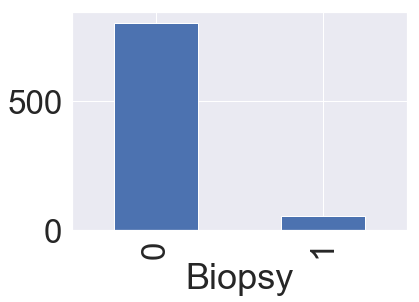

In [22]:
ax = data['Biopsy'].value_counts(sort=False).plot.bar()
plt.xlabel('Biopsy')


observation:
    1. Here we can see Data Imbalance.


### 1.6 Check Correlation Plot. And your observations?

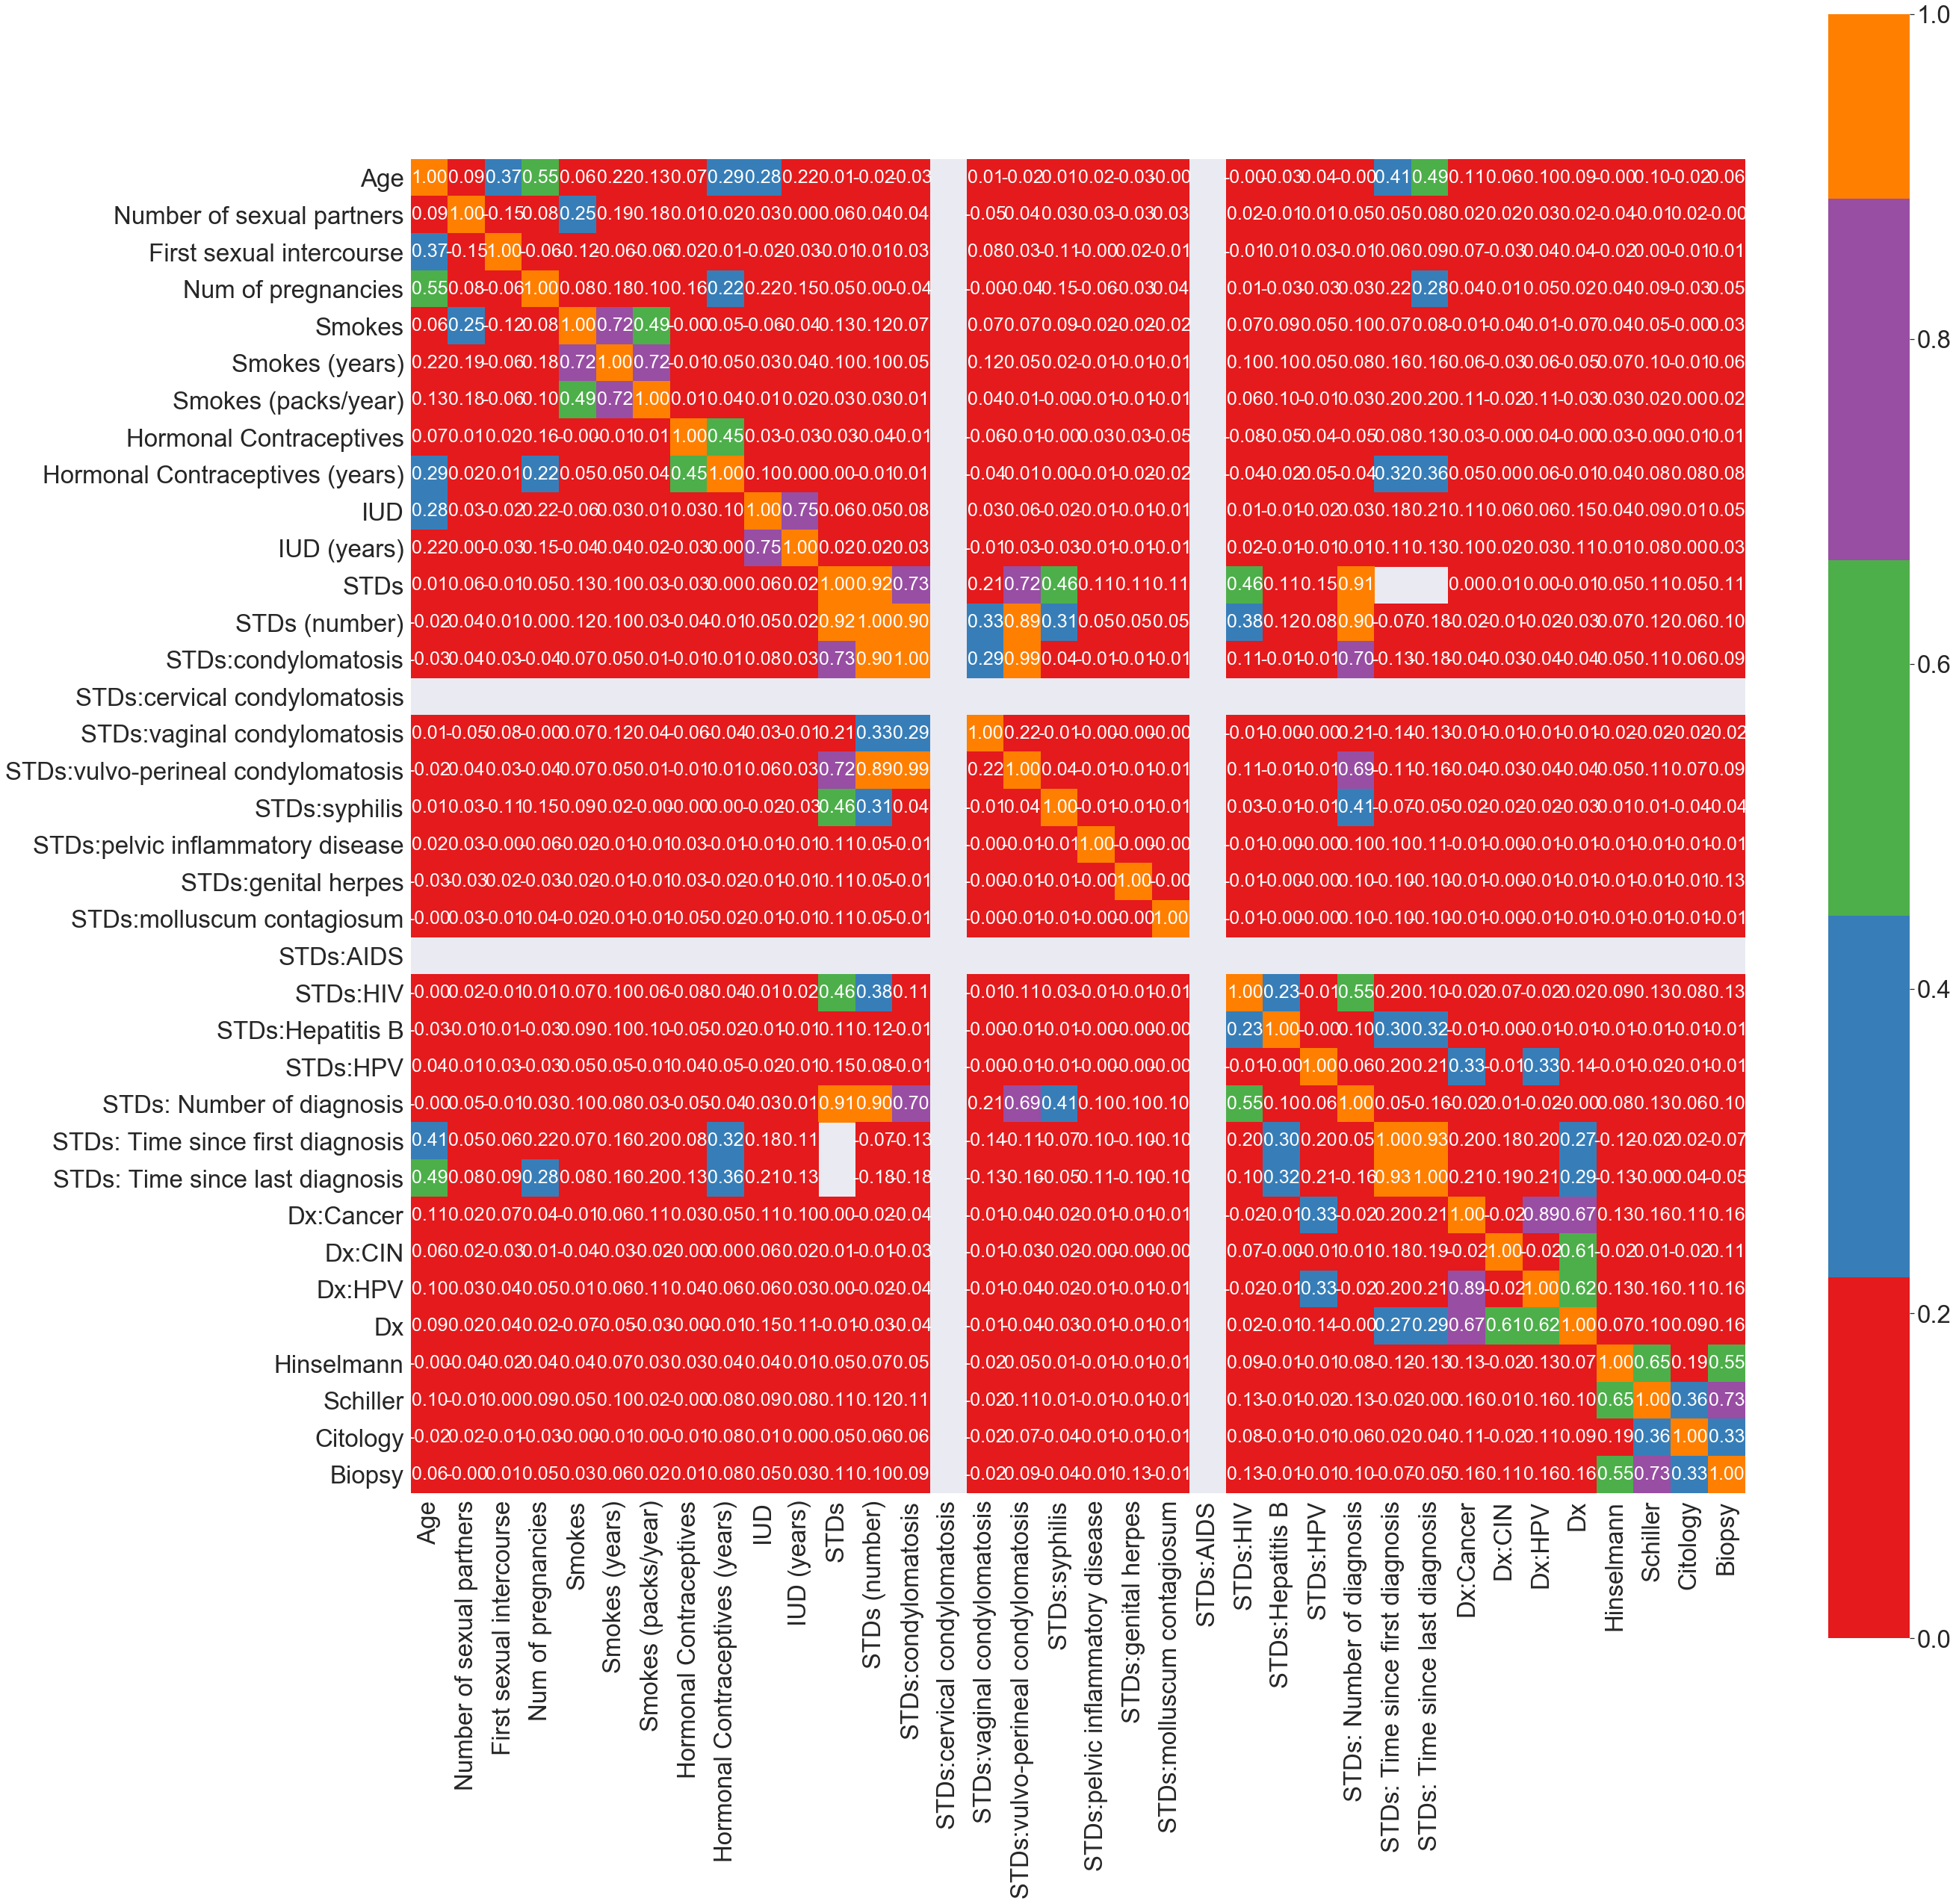

In [23]:
# correlation plot
correlationMap = data.corr()

plt.figure(figsize=(40,40))

sns.set(font_scale=3)
hm = sns.heatmap(correlationMap,cmap = 'Set1', cbar=True, annot=True,vmin=0,vmax =1,center=True, square=True, fmt='.2f', annot_kws={'size': 25},
             yticklabels = data.columns, xticklabels = data.columns)
plt.show()

#### observation:
    1. It is difficult to see which attributes are correlated, hence it would be more practical to plot heatmaps for one attribute at a time. Also the above correlations can be deduced intuitively. 
    2. such as; STDs(number) correlated with STDs and IUD correlated with IUD(years) and so on. 
    3. It may seem obvious, but a noteworthy correaltion to mention is; Age and number of pregnancies at 0.58 correlation.

### 1.6a) list the heatmap of top correlation


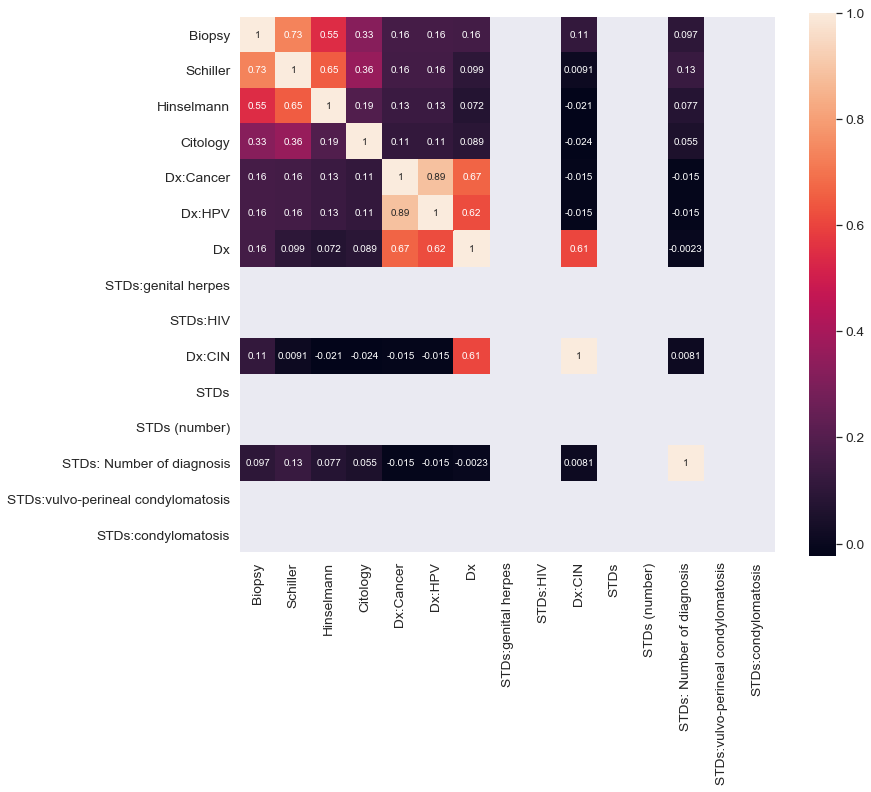

In [30]:
# list the heatmap of top correlation

corr = data.corr()

# number of variables for heatmap
k = 15

cols = corr.nlargest(k, 'Biopsy')['Biopsy'].index
cm = np.corrcoef(data[cols].values.T)

plt.figure(figsize=(12, 10))

sns.set(font_scale=1.25)
sns.heatmap(cm, cbar = True, annot = True, square = True, annot_kws = {'size': 10},
                 yticklabels = cols.values, xticklabels = cols.values)
plt.show()

#### observation:
    1. In this heat map we can clearly see the data correlation or not.

### 1.7 Imputing the missing values from the given dataset?

In [31]:
# we will impute the categorical variables with 0 or 1 and continuous variables with median value

data['Number of sexual partners'] = data['Number of sexual partners'].fillna(data['Number of sexual partners'].median())
data['Number of sexual partners'].isnull().any()

# data['Number of sexual partners'].value_counts()

False

In [32]:
# Imputing the missing values from First sexual intercourse

data['First sexual intercourse'] = data['First sexual intercourse'].fillna(data['First sexual intercourse'].median())
data['First sexual intercourse'].isnull().any()

# data['First sexual intercourse'].value_counts()

False

In [33]:
# Imputing the missing values from Num of pregnancies

data['Num of pregnancies'] = data['Num of pregnancies'].fillna(data['Num of pregnancies'].median())
data['Num of pregnancies'].isnull().any()

# data['Num of pregnancies'].value_counts()

False

In [34]:
# Imputing the missing values from Smokes

data['Smokes'] = data['Smokes'].fillna(data['Smokes'].median())
data['Smokes'].isnull().any()

# data['Smokes'].value_counts()

False

In [35]:
# Imputing the missing values from Smokes (years)

data['Smokes (years)'] = data['Smokes (years)'].fillna(1)
data['Smokes (years)'].isnull().any()

# data['Smokes (years)'].value_counts()

False

In [36]:
# Imputing the missing values from Smokes (packs/year)

data['Smokes (packs/year)'] = data['Smokes (packs/year)'].fillna(data['Smokes (packs/year)'].median())
data['Smokes (packs/year)'].isnull().any()

# data['Smokes (packs/year)'].value_counts()

False

In [37]:
# Imputing the missing values from Hormonal Contraceptives

data['Hormonal Contraceptives'] = data['Hormonal Contraceptives'].fillna(data['Hormonal Contraceptives'].median())
data['Hormonal Contraceptives'].isnull().any()

# data['Hormonal Contraceptives'].value_counts()

False

In [38]:
# Imputing the missing values from Hormonal Contraceptives (years)

data['Hormonal Contraceptives (years)'] = data['Hormonal Contraceptives (years)'].fillna(data['Hormonal Contraceptives (years)'].median())
data['Hormonal Contraceptives (years)'].isnull().any()

# data['Hormonal Contraceptives (years)'].value_counts()

False

In [39]:
# Imputing the missing values from IUD

data['IUD'] = data['IUD'].fillna(0)
data['IUD'].isnull().any()

# data['IUD'].value_counts()

False

In [40]:
# Imputing the missing values from IUD (years)

data['IUD (years)'] = data['IUD (years)'].fillna(0)
data['IUD (years)'].isnull().any()

# data['IUD (years)'].value_counts()

False

In [41]:
# Imputing the missing values from STDs

data['STDs'] = data['STDs'].fillna(1)
data['STDs'].isnull().any()

# data['STDs'].value_counts()

False

In [42]:
# Imputing the missing values from STDs (number)

data['STDs (number)'] = data['STDs (number)'].fillna(data['STDs (number)'].median())
data['STDs (number)'].isnull().any()

# data['STDs (number)'].value_counts()

False

In [43]:
# Imputing the missing values from STDs:condylomatosis

data['STDs:condylomatosis'] = data['STDs:condylomatosis'].fillna(data['STDs:condylomatosis'].median())
data['STDs:condylomatosis'].isnull().any()

# data['STDs:condylomatosis'].value_counts()

False

In [44]:
# Imputing the missing values from STDs:cervical condylomatosis

data['STDs:cervical condylomatosis'] = data['STDs:cervical condylomatosis'].fillna(data['STDs:cervical condylomatosis'].median())
data['STDs:cervical condylomatosis'].isnull().any()

# data['STDs:cervical condylomatosis'].value_counts()

False

In [45]:
# Imputing the missing values from STDs:vaginal condylomatosis

data['STDs:vaginal condylomatosis'] = data['STDs:vaginal condylomatosis'].fillna(data['STDs:vaginal condylomatosis'].median())
data['STDs:vaginal condylomatosis'].isnull().any()

# data['STDs:vaginal condylomatosis'].value_counts()

False

In [46]:
# Imputing the missing values from STDs:vulvo-perineal condylomatosis

data['STDs:vulvo-perineal condylomatosis'] = data['STDs:vulvo-perineal condylomatosis'].fillna(data['STDs:vulvo-perineal condylomatosis'].median())
data['STDs:vulvo-perineal condylomatosis'].isnull().any()

# data['STDs:vulvo-perineal condylomatosis'].value_counts()

False

In [47]:
# Imputing the missing values from STDs:syphilis

data['STDs:syphilis'] = data['STDs:syphilis'].fillna(data['STDs:syphilis'].median())
data['STDs:syphilis'].isnull().any()

# data['STDs:syphilis'].value_counts()

False

In [48]:
# Imputing the missing values from STDs:pelvic inflammatory diseases

data['STDs:pelvic inflammatory disease'] = data['STDs:pelvic inflammatory disease'].fillna(data['STDs:pelvic inflammatory disease'].median())
data['STDs:pelvic inflammatory disease'].isnull().any()

# data['STDs:pelvic inflammatory disease'].value_counts()

False

In [49]:
# Imputing the missing values from STDs:genital herpes

data['STDs:genital herpes'] = data['STDs:genital herpes'].fillna(data['STDs:genital herpes'].median())
data['STDs:genital herpes'].isnull().any()

# data['STDs:genital herpes'].value_counts()

False

In [50]:
# Imputing the missing values from STDs:molluscum contagiosum

data['STDs:molluscum contagiosum'] = data['STDs:molluscum contagiosum'].fillna(data['STDs:molluscum contagiosum'].median())
data['STDs:molluscum contagiosum'].isnull().any()

# data['STDs:molluscum contagiosum'].value_counts()

False

In [51]:
# Imputing the missing values from STDs:AIDS

data['STDs:AIDS'] = data['STDs:AIDS'].fillna(data['STDs:AIDS'].median())
data['STDs:AIDS'].isnull().any()

# data['STDs:AIDS'].value_counts()

False

In [52]:
# Imputing the missing values from STDs:HIV

data['STDs:HIV'] = data['STDs:HIV'].fillna(data['STDs:HIV'].median())
data['STDs:HIV'].isnull().any()

# data['STDs:HIV'].value_counts()

False

In [53]:
# Imputing the missing values from STDs:Hepatitis B

data['STDs:Hepatitis B'] = data['STDs:Hepatitis B'].fillna(data['STDs:Hepatitis B'].median())
data['STDs:Hepatitis B'].isnull().any()

# data['STDs:Hepatitis B'].value_counts()

False

In [54]:
# Imputing the missing values from STDs:HPV

data['STDs:HPV'] = data['STDs:HPV'].fillna(data['STDs:HPV'].median())
data['STDs:HPV'].isnull().any()

# data['STDs:HPV'].value_counts()

False

In [55]:
# Imputing the missing values from STDs: Time since first diagnosis

data['STDs: Time since first diagnosis'] = data['STDs: Time since first diagnosis'].fillna(data['STDs: Time since first diagnosis'].median())
data['STDs: Time since first diagnosis'].isnull().any()

# data['STDs: Time since first diagnosis'].value_counts()

False

In [56]:
# Imputing the missing values from STDs: Time since last diagnosis

data['STDs: Time since last diagnosis'] = data['STDs: Time since last diagnosis'].fillna(data['STDs: Time since last diagnosis'].median())
data['STDs: Time since last diagnosis'].isnull().any()
 
# data['STDs: Time since last diagnosis'].value_counts()

False

###  1.8 Imputing null values for categorical variables for get_dummies

In [57]:
data = pd.get_dummies(data = data, columns = ['Smokes','Hormonal Contraceptives','IUD','STDs',
                                      'Dx:Cancer','Dx:CIN','Dx:HPV','Dx','Hinselmann','Citology','Schiller'])

data.isnull().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives (years)       0
IUD (years)                           0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0
STDs: Number of diagnosis             0
STDs: Time since first diagnosis      0
STDs: Time since last diagnosis       0
Biopsy                                0


In [58]:
data.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),STDs (number),STDs:condylomatosis,...,Dx:HPV_0,Dx:HPV_1,Dx_0,Dx_1,Hinselmann_0,Hinselmann_1,Citology_0,Citology_1,Schiller_0,Schiller_1
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,...,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.511655,16.995338,2.257576,1.216392,0.446278,2.035331,0.444604,0.155012,0.051282,...,0.979021,0.020979,0.972028,0.027972,0.959207,0.040793,0.948718,0.051282,0.913753,0.086247
std,8.497948,1.644759,2.791883,1.400981,4.057974,2.210351,3.567040,1.814218,0.529617,0.220701,...,0.143398,0.143398,0.164989,0.164989,0.197925,0.197925,0.220701,0.220701,0.280892,0.280892
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,37.000000,37.000000,30.000000,19.000000,4.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 1.10 Data Visualization for checking any categorical variables or not using count plot?

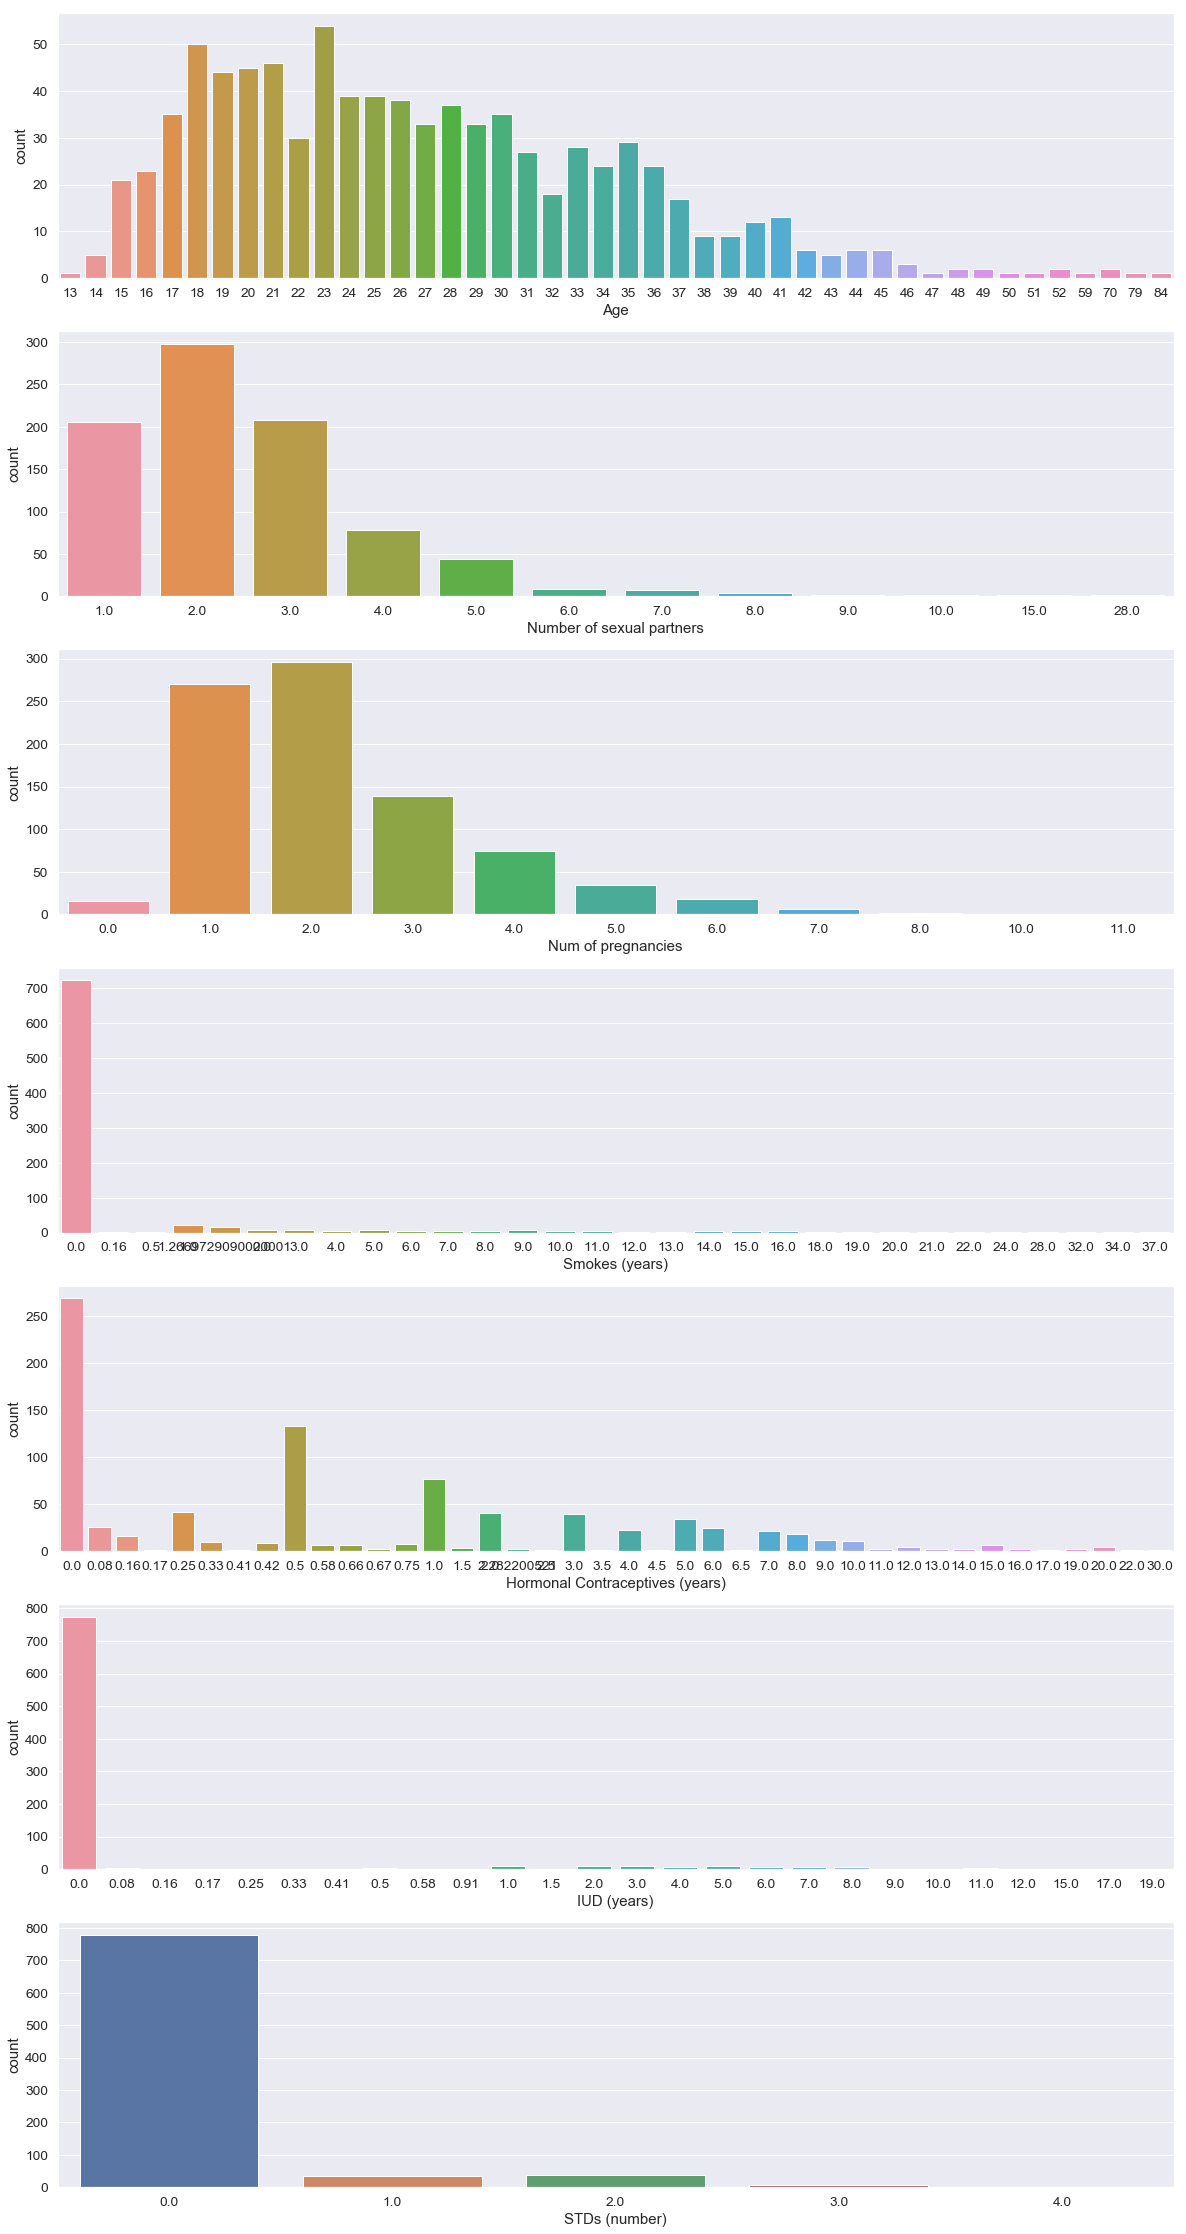

In [59]:
fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7) = plt.subplots(7, 1, figsize = (20,40))
sns.countplot(x='Age', data=data, ax=ax1)
sns.countplot(x='Number of sexual partners', data=data, ax=ax2)
sns.countplot(x='Num of pregnancies', data=data, ax=ax3)
sns.countplot(x='Smokes (years)', data=data, ax=ax4)
sns.countplot(x='Hormonal Contraceptives (years)', data=data, ax=ax5)
sns.countplot(x='IUD (years)', data=data, ax=ax6)
sns.countplot(x='STDs (number)', data=data, ax=ax7)

### 1.11 splitting the dataset into dependent and independent variables?

In [60]:
x = data.iloc[:,:46]
y = data.iloc[:,46]

print(x.shape)
print(y.shape)


(858, 46)
(858,)


### 1.12 splitting the dataset into  training and test set?

In [62]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 45)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(514, 46)
(514,)
(344, 46)
(344,)


# The End